In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [3]:
#our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


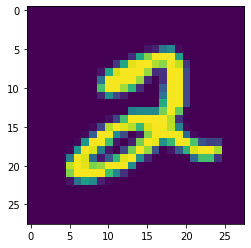

9


In [4]:
#sample of our dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[5])
plt.show()
print(y_train[4])

In [5]:
#defining some parameters for our model
num_classes = 10
#as we have 10 classes (0-9) 
#we need to prdeict one out of 10 which has high probability
epochs = 30
img_rows = 28 
img_cols = 28
#as each image is 28 by 28 pixel


In [6]:
#normalizing image 
x_train =x_train.astype(float)
x_train =x_train/255
x_test =x_test.astype(float)
x_test =x_test/255

#y_train =y_train/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [7]:

if K.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    

In [8]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [9]:
#model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 32)         1

In [11]:
#fit the model
model.fit(x_train,y_train,batch_size=200,epochs=epochs,validation_data=(x_test,y_test))
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/30
300/300 [==============================] - 44s 143ms/step - loss: 0.4611 - accuracy: 0.8657 - val_loss: 0.7692 - val_accuracy: 0.7131
Epoch 2/30
300/300 [==============================] - 44s 146ms/step - loss: 0.1130 - accuracy: 0.9696 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 3/30
300/300 [==============================] - 43s 145ms/step - loss: 0.0766 - accuracy: 0.9791 - val_loss: 0.0390 - val_accuracy: 0.9882
Epoch 4/30
300/300 [==============================] - 44s 146ms/step - loss: 0.0612 - accuracy: 0.9837 - val_loss: 0.0387 - val_accuracy: 0.9884
Epoch 5/30
300/300 [==============================] - 54s 178ms/step - loss: 0.0510 - accuracy: 0.9863 - val_loss: 0.0362 - val_accuracy: 0.9907
Epoch 6/30
300/300 [==============================] - 48s 161ms/step - loss: 0.0453 - accuracy: 0.9874 - val_loss: 0.0370 - val_accuracy: 0.9892
Epoch 7/30
300/300 [==============================] - 47s 157ms/step - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0248 - val_ac

In [12]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is:",score)
print("Accuracy:",acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0273 - accuracy: 0.9930
Score is : 0.027290359139442444
Accuracy : 0.9929999709129333


In [13]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")